In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


# Import Libraries

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Data

In [157]:
data=pd.read_csv("/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv")
print(data.head(5))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [158]:
data.size

459615

In [159]:
data.shape

(30641, 15)

In [160]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# Data Cleaning

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [162]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [163]:
data=data.drop("Unnamed: 0", axis=1)
print(data.head(5))

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [164]:
data.dropna(subset=["NrSiblings","WklyStudyHours","IsFirstChild","PracticeSport", "ParentMaritalStatus"], inplace=True)
data.isnull().sum()

Gender                    0
EthnicGroup            1512
ParentEduc             1531
LunchType                 0
TestPrep               1536
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings                0
TransportMeans         2628
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [165]:
data["NrSiblings"]=data["NrSiblings"].astype(int)
print(data.dtypes)

Gender                 object
EthnicGroup            object
ParentEduc             object
LunchType              object
TestPrep               object
ParentMaritalStatus    object
PracticeSport          object
IsFirstChild           object
NrSiblings              int64
TransportMeans         object
WklyStudyHours         object
MathScore               int64
ReadingScore            int64
WritingScore            int64
dtype: object


In [166]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [167]:
data.rename(columns={"NrSiblings":"Siblings"})

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,Siblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,5 - 10,82,90,93


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

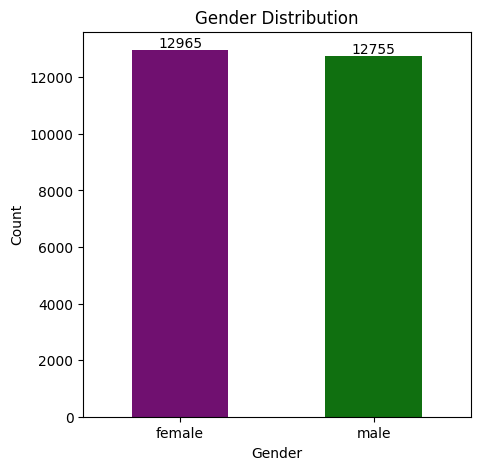

In [168]:
plt.figure(figsize=(5,5))
colors=["Purple", "Green"]
ax=sns.countplot(data=data, x="Gender", palette=colors, width=0.5)
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show


>  The visualisation represents number of female students are more than male students

In [169]:
gen_mean=data.groupby("Gender").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gen_mean)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.111685     72.903895     72.909834
male    69.052450     65.839749     63.904743


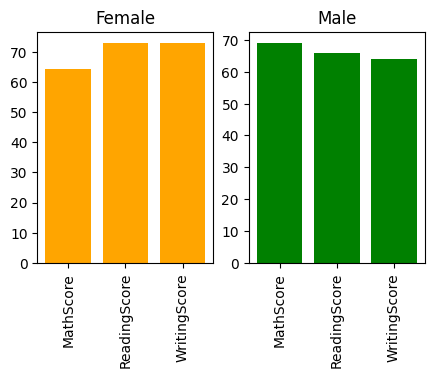

In [170]:
figure, axs = plt.subplots(1, 2, figsize=(5, 3))
axs[0].bar(gen_mean.columns, gen_mean.loc['female'], color='orange')
axs[0].set_xticks(range(len(gen_mean.columns)))  
axs[0].set_xticklabels(gen_mean.columns, rotation=90) 
axs[0].set_title('Female')
axs[1].bar(gen_mean.columns, gen_mean.loc['male'], color='green')
axs[1].set_xticks(range(len(gen_mean.columns))) 
axs[1].set_xticklabels(gen_mean.columns, rotation=90)  
axs[1].set_title('Male')
plt.show()

> The two subplots above shws male students are stronger in maths as compared to female students while female students are stronger in reading and writing in comparison to male students

In [171]:
data["ParentEduc"]=data["ParentEduc"].str.replace("some high school", "high school")
gp=data.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean", "WritingScore":"mean"})
print(gp)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.423671     71.235635     70.417667
bachelor's degree   70.521524     73.242061     73.509527
high school         63.460260     66.288515     64.446729
master's degree     72.335106     75.923759     76.423759
some college        66.503830     69.262070     68.605202


<function matplotlib.pyplot.show(close=None, block=None)>

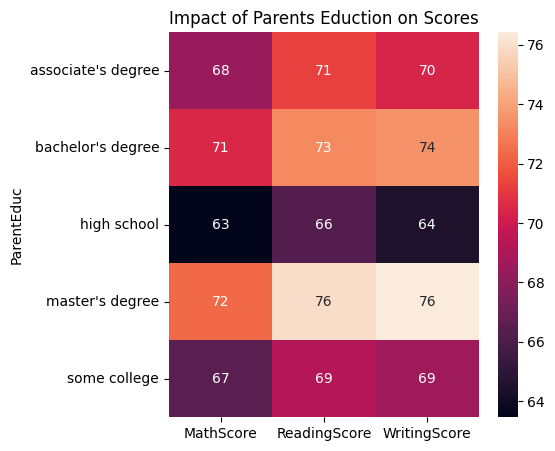

In [172]:
plt.figure(figsize=(5,5))
sns.heatmap(gp,annot=True)
plt.title("Impact of Parents Eduction on Scores")
plt.show

> Parents Eductions has a great impact on students'score. Students with masters and bachelors eduction of parents tend to score better than the others

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.784441     69.754110     68.874276
married              66.646963     69.383342     68.405067
single               66.128949     69.174081     68.223727
widowed              67.489279     69.660819     68.602339


<function matplotlib.pyplot.show(close=None, block=None)>

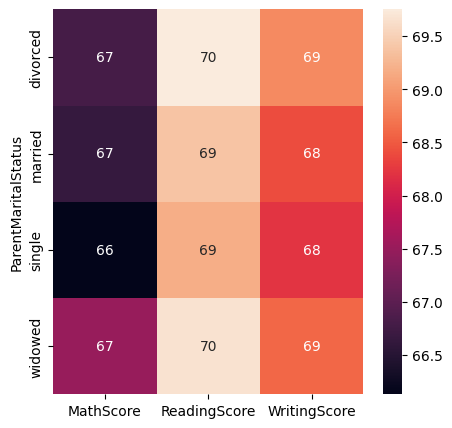

In [173]:
gp1=data.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean", "WritingScore":"mean"})
print(gp1)
plt.figure(figsize=(5,5))
sns.heatmap(gp1,annot=True)
plt.show

> The visualisation depicts that the marital status has little or no impact on the scores

In [174]:
data["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

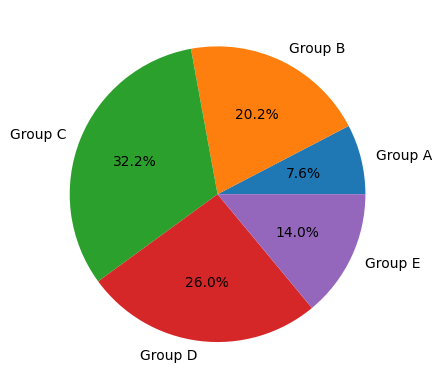

In [175]:
gpA= data.loc[(data["EthnicGroup"]=="group A")].count()
gpB= data.loc[(data["EthnicGroup"]=="group B")].count()
gpC= data.loc[(data["EthnicGroup"]=="group C")].count()
gpD= data.loc[(data["EthnicGroup"]=="group D")].count()
gpE= data.loc[(data["EthnicGroup"]=="group E")].count()


mlist=[gpA["EthnicGroup"],gpB["EthnicGroup"], gpC["EthnicGroup"], gpD["EthnicGroup"], gpE["EthnicGroup"]]
l=["Group A", "Group B", "Group C", "Group D", "Group E"]

plt.pie(x=mlist, labels=l,autopct="%1.1f%%")

plt.show()

The pie chart shows that the large number of students belonged from Group C followed with Group D 

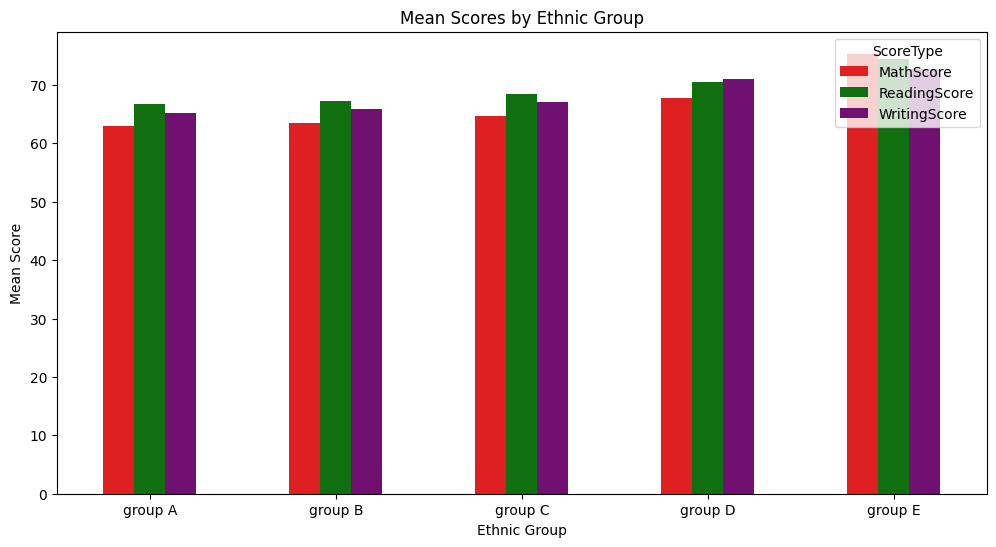

In [176]:
df=data.groupby("EthnicGroup").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"}).reset_index()
df_melted=df.melt(id_vars="EthnicGroup", var_name="ScoreType", value_name="MeanScore")
plt.figure(figsize=(12, 6))
colors=["red", "green", "purple"]
sns.barplot(data=df_melted, x="EthnicGroup", y="MeanScore", hue="ScoreType",width=0.5, palette=colors)
plt.title("Mean Scores by Ethnic Group")
plt.xlabel("Ethnic Group")
plt.ylabel("Mean Score")
plt.show()


> Almost students from all the groups perforemed better in Reading, followed by Writing and Maths including Group C which is highest in number. Also interesting to note that group E performed better in Maths than Reading and Writing.

<Axes: >

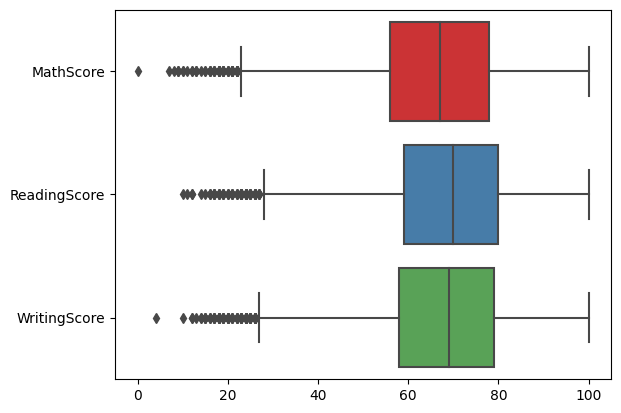

In [177]:
sns.boxplot(data=data[['MathScore', 'ReadingScore', 'WritingScore']], palette="Set1", orient="h")

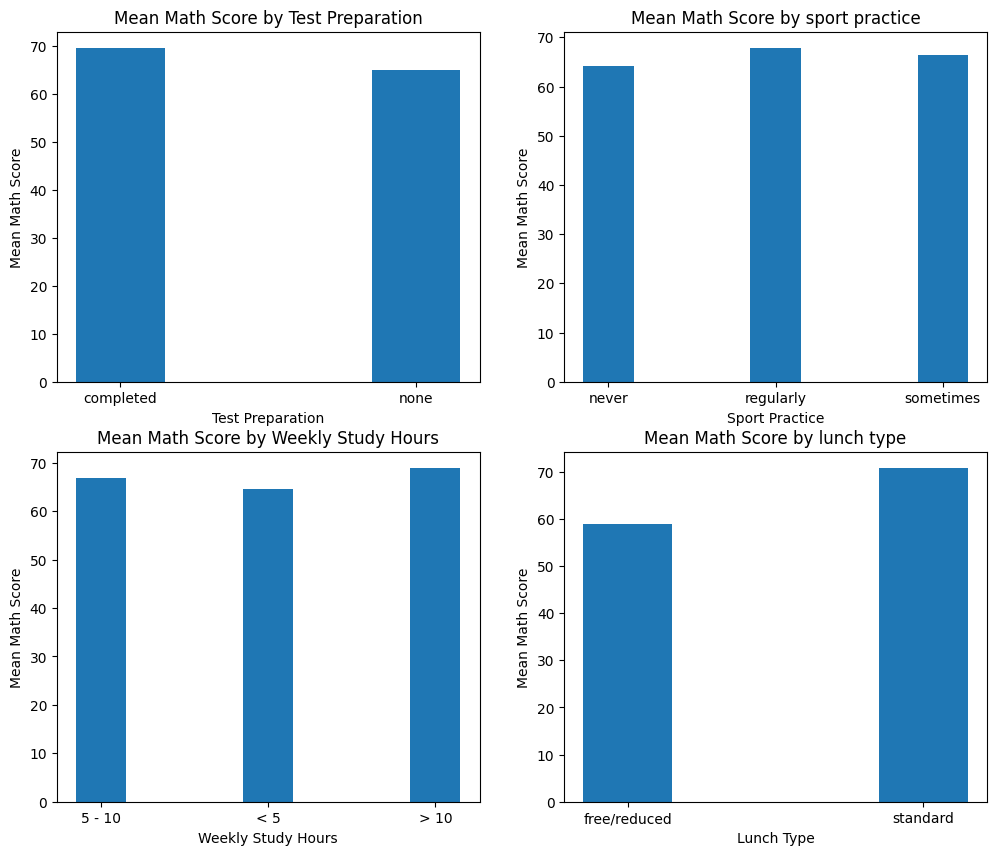

In [178]:
fig, bars = plt.subplots(2, 2, figsize=(12, 10))

test = data.groupby("TestPrep").agg({"MathScore": "mean"}).reset_index()

bars[0, 0].bar(test["TestPrep"], test["MathScore"], width=0.3)
bars[0, 0].set_title('Mean Math Score by Test Preparation')
bars[0, 0].set_xlabel('Test Preparation')
bars[0, 0].set_ylabel('Mean Math Score')

study_hours=data.groupby("WklyStudyHours").agg({"MathScore": "mean"}).reset_index()

bars[1, 0].bar(study_hours["WklyStudyHours"], study_hours["MathScore"], width=0.3)

bars[1, 0].set_title('Mean Math Score by Weekly Study Hours')
bars[1, 0].set_xlabel('Weekly Study Hours')
bars[1, 0].set_ylabel('Mean Math Score')

sport=data.groupby("PracticeSport").agg({"MathScore":"mean"}).reset_index()

bars[0, 1].bar(sport["PracticeSport"], sport["MathScore"], width=0.3)
bars[0, 1].set_title('Mean Math Score by sport practice')
bars[0, 1].set_xlabel('Sport Practice')
bars[0, 1].set_ylabel('Mean Math Score')

lun=data.groupby("LunchType").agg({"MathScore":"mean"}).reset_index()

bars[1, 1].bar(lun["LunchType"], lun["MathScore"], width=0.3)
bars[1, 1].set_title('Mean Math Score by lunch type')
bars[1, 1].set_xlabel('Lunch Type')
bars[1, 1].set_ylabel('Mean Math Score')

plt.show()




>  The subplots above shows that factors such as test prep, sports practice, weekly study hours and the type of lunch affects scoring in maths. However, the lunch type has a huge impact as the plot shows that the students who consume reduced/free lunch tend to attain score below 60

> 